In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
df = pd.read_json('dataset/WLASL_v0.3.json') 

In [3]:
df

,gloss,instances
0,book,"[{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra..."
1,drink,"[{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f..."
2,computer,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
3,before,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
4,chair,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
...,...,...
1995,washington,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
1996,waterfall,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
1997,weigh,"[{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_..."
1998,wheelchair,"[{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f..."


In [4]:
missing_id = np.loadtxt("dataset/missing.txt")

For all words, there is a huge number of videos that represent them

In [5]:
df["instances"]

0       [{'bbox': [385, 37, 885, 720], 'fps': 25, 'fra...
1       [{'bbox': [551, 68, 1350, 1080], 'fps': 25, 'f...
2       [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
3       [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
4       [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
                              ...                        
1995    [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
1996    [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
1997    [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
1998    [{'bbox': [415, 86, 1811, 1080], 'fps': 25, 'f...
1999    [{'bbox': [0, 0, 360, 240], 'fps': 25, 'frame_...
Name: instances, Length: 2000, dtype: object

In [6]:
final_dataframe = pd.DataFrame()

In [7]:
for count, gloss in enumerate(df["gloss"]):
    instances = df.iloc[count]['instances']
    for instance in instances:
        if int(instance["video_id"]) not in missing_id:
            temp_instance = instance.copy()
            temp_instance["bbox_xmin"] = temp_instance["bbox"][0]
            temp_instance["bbox_ymin"] = temp_instance["bbox"][1]
            temp_instance["bbox_xmax"] = temp_instance["bbox"][2]
            temp_instance["bbox_ymax"] = temp_instance["bbox"][3]
            del temp_instance["bbox"]
            temp_instance["gloss"] = gloss
            final_dataframe = final_dataframe.append(temp_instance, ignore_index=True)

C:\Users\thoma\AppData\Local\Temp\ipykernel_4564\19480035.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_dataframe = final_dataframe.append(temp_instance, ignore_index=True)
C:\Users\thoma\AppData\Local\Temp\ipykernel_4564\19480035.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_dataframe = final_dataframe.append(temp_instance, ignore_index=True)
C:\Users\thoma\AppData\Local\Temp\ipykernel_4564\19480035.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_dataframe = final_dataframe.append(temp_instance, ignore_index=True)
C:\Users\thoma\AppData\Local\Temp\ipykernel_4564\19480035.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use 

In [8]:
final_dataframe

,fps,frame_end,frame_start,instance_id,signer_id,source,split,url,variation_id,video_id,bbox_xmin,bbox_ymin,bbox_xmax,bbox_ymax,gloss
0,25,-1,1,0,118,aslbrick,train,http://aslbricks.org/New/ASL-Videos/book.mp4,0,69241,385,37,885,720,book
1,25,-1,1,10,31,signschool,train,https://signstock.blob.core.windows.net/signsc...,0,07069,462,44,949,720,book
2,25,-1,1,17,36,startasl,train,https://s3-us-west-1.amazonaws.com/files.start...,0,07068,234,17,524,414,book
3,25,-1,1,22,59,asldeafined,train,https://media.asldeafined.com/vocabulary/14666...,0,07070,131,26,526,480,book
4,25,-1,1,24,12,aslsearch,val,http://www.aslsearch.com/signs/videos/book.mp4,0,07099,162,54,528,400,book
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11975,25,-1,1,5,11,signingsavvy,train,https://www.signingsavvy.com/signs/mp4/5/5233.mp4,0,63047,39,13,248,192,wheelchair
11976,25,-1,1,8,12,aslsearch,train,http://www.aslsearch.com/signs/videos/wheelcha...,0,63050,163,62,625,400,wheelchair
11977,25,-1,1,2,2,spreadthesign,train,https://media.spreadthesign.com/video/mp4/13/9...,0,63186,76,17,236,240,whistle
11978,25,-1,1,4,11,signingsavvy,train,https://www.signingsavvy.com/signs/mp4/9/9961.mp4,0,63188,68,14,212,192,whistle


Check if one video referred to a single word

In [10]:
final_dataframe["video_id"].value_counts()

69241    1
27659    1
27441    1
65895    1
27633    1
        ..
03642    1
04176    1
65110    1
04168    1
63190    1
Name: video_id, Length: 11980, dtype: int64

In [11]:
final_dataframe.to_csv('dataset/Video Information Extraction.csv', index = False, encoding='utf-8') # False: not include index

### Distribution of each world

C:\Users\thoma\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

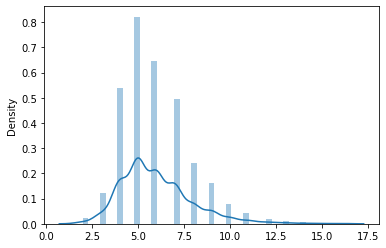

In [12]:
sns.distplot(np.array(final_dataframe["gloss"].value_counts()))